# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

#this function will allow me to get a list of cities which are nearest to a set of lat/longs i create
from citipy import citipy

# Google and weather API Keys
from api_keys import gkey, weather_api_key

## Generate Cities List

In [39]:
# first create a "random" set of lat/longs

lats = np.random.uniform(low = -90, high = 90, size = 75)
lngs = np.random.uniform(low = -180, high = 180, size = 75)

city = []
country = []

# now those lat/longs have to be in pairs to use the citipy function
lat_lng = zip(lats, lngs)

# run a loop calling citipy to get the nearest city to the lat/long created
for lat in lat_lng:
    city.append(citipy.nearest_city(lat[0], lat[1]).city_name)
    country.append(citipy.nearest_city(lat[0], lat[1]).country_code)

# create a list of all the data
cities_to_truncate = [city, country]   #, city_lat, city_lng

# make sure the cities are unique then cut the list to 500  
np.unique(cities_to_truncate)

cities = cities_to_truncate[0][:50]
countries = cities_to_truncate[1][:50] 

# i have a list of "random" cities to be able to use

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# create the base url and the lists which i'll be using to store data

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
city_lats = []
city_lngs = []
temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
count = 0

# loop through the data, call it through the api, then create lists of the needed data
for city in cities:
    try:
        url_string = (base_url + '&appid=' + weather_api_key + '&q=' + city)
        city_lat_lng = requests.get(url_string)
        weather_data = city_lat_lng.json()
        city_lats.append(weather_data['coord']['lat'])
        city_lngs.append(weather_data['coord']['lon'])
        temps.append(weather_data['main']['temp'])
        humidities.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speeds.append(weather_data['wind']['speed'])
        dates.append(weather_data['dt'])
        city_num = (weather_data['id'])
        print(f"City: {city}  City ID: {city_num}")

    except:
        print("City not found")
        city_lats.append(0)
        city_lngs.append(0)
        temps.append(0)
        humidities.append(101)  #make the humidity over 100 to remove the city later
        cloudiness.append(0)
        wind_speeds.append(0)
        dates.append(0)

City: jamestown  City ID: 5122534
City: campo alegre  City ID: 3403611
City: saint anthony  City ID: 5044290
City not found
City: qaanaaq  City ID: 3831208
City: hilo  City ID: 5855927
City not found
City: ushuaia  City ID: 3833367
City: mataura  City ID: 6201424
City not found
City: wagar  City ID: 364027
City: magadan  City ID: 2123628
City: anadyr  City ID: 2127202
City: arraial do cabo  City ID: 3471451
City: albany  City ID: 5106841
City not found
City: qaanaaq  City ID: 3831208
City not found
City: mayya  City ID: 2020121
City: victoria  City ID: 1819729
City: ondjiva  City ID: 3346821
City: yerbogachen  City ID: 2012956
City: kapaa  City ID: 5848280
City: cape town  City ID: 3369157
City: marzuq  City ID: 72181
City: bambous virieux  City ID: 1106677
City: new norfolk  City ID: 2155415
City: jaciara  City ID: 3460355
City not found
City not found
City: kudahuvadhoo  City ID: 1337607
City: rikitea  City ID: 4030556
City: krasnovishersk  City ID: 542184
City: bolitoc  City ID: 172

In [43]:
# print(json.dumps(weather_data, indent=2, sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_weather = {"City": cities,
                "Lat": city_lats,
                "Lng": city_lngs,
                "High Temp": temps,
                "Humidity": humidities,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speeds,
                "Country": countries,
                "Date": dates
               }
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.head()


,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,66.69,77,90,11.41,sh,1602371576
1,campo alegre,-9.78,-36.35,77.00,83,20,13.87,br,1602371718
2,saint anthony,45.02,-93.22,62.35,34,1,3.36,ca,1602371718
3,taolanaro,0.00,0.00,0.00,101,0,0.00,mg,0
4,qaanaaq,77.48,-69.36,31.82,80,77,8.72,gl,1602371718


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
#  Get the indices of cities that have humidity over 100%.
cities_more_100 = city_weather_df.loc[city_weather_df['Humidity']>100]
cities_more_100

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,0
6,illoqqortoormiut,0.0,0.0,0.0,101,0,0.0,gl,0
9,hendijan,0.0,0.0,0.0,101,0,0.0,ir,0
15,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,0
17,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,0
28,nizhneyansk,0.0,0.0,0.0,101,0,0.0,ru,0
29,marcona,0.0,0.0,0.0,101,0,0.0,pe,0
40,saleaula,0.0,0.0,0.0,101,0,0.0,ws,0
45,umzimvubu,0.0,0.0,0.0,101,0,0.0,za,0
48,obluche,0.0,0.0,0.0,101,0,0.0,ru,0


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.loc[city_weather_df['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,66.69,77,90,11.41,sh,1602371576
1,campo alegre,-9.78,-36.35,77.00,83,20,13.87,br,1602371718
2,saint anthony,45.02,-93.22,62.35,34,1,3.36,ca,1602371718
4,qaanaaq,77.48,-69.36,31.82,80,77,8.72,gl,1602371718
5,hilo,19.73,-155.09,81.36,58,75,9.17,us,1602371618


In [47]:
# output the csv file of all the cities which weather can find
clean_city_data.to_csv('../output_data/cities_test.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

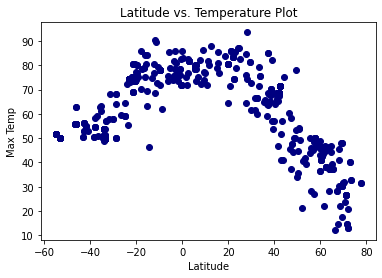

In [7]:
plt.scatter(clean_city_data['Lat'],clean_city_data['High Temp'],marker="o",color="navy")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature Plot')

plt.show()

## Latitude vs. Humidity Plot

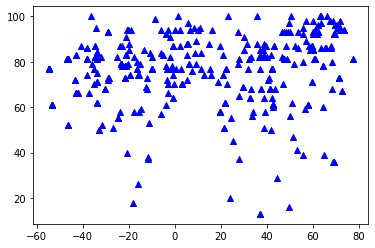

In [8]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker="^",color="blue")

## Latitude vs. Cloudiness Plot

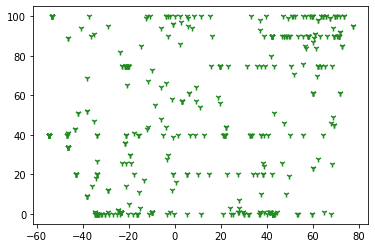

In [9]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker="1",color="forestgreen")

## Latitude vs. Wind Speed Plot

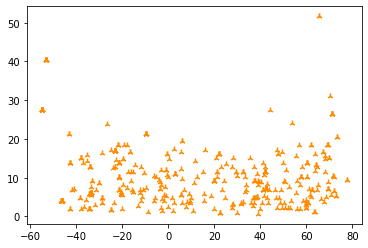

In [10]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker="2",color="darkorange")

## Linear Regression

In [11]:
# start with dividing the data into northern and southern hemisphere

northern_data = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern_data = clean_city_data.loc[clean_city_data['Lat'] <= 0]
southern_data

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.55,169.27,80.02,74,30,14.92,vu,1602368675
4,tuatapere,-46.13,167.68,55.99,81,41,4.00,nz,1602368676
10,vaini,-21.20,-175.20,75.20,83,75,13.87,to,1602368677
12,port elizabeth,-33.92,25.57,53.60,71,40,5.82,za,1602368677
13,rikitea,-23.12,-134.97,74.30,79,1,16.91,pf,1602368434
...,...,...,...,...,...,...,...,...,...
491,sorong,-0.88,131.25,78.53,87,96,11.97,id,1602368680
492,ushuaia,-54.80,-68.30,51.80,77,40,27.51,ar,1602368418
495,bengkulu,-3.80,102.27,75.61,92,100,7.11,id,1602368757
498,rikitea,-23.12,-134.97,74.30,79,1,16.91,pf,1602368434


In [12]:
# create a linear regression function which creates the plots with the call

def lin_regression(x_values, y_values, mrkr, clr, ann_x, ann_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker=mrkr,color=clr)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="black")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

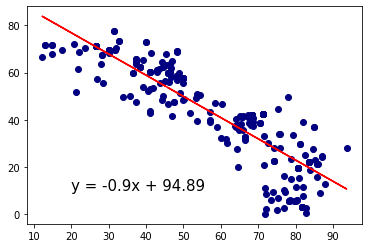

In [28]:
lin_regression(northern_data['High Temp'],northern_data['Lat'], 'o', 'navy', 20, 10)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

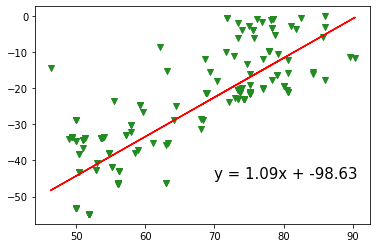

In [14]:
lin_regression(southern_data['High Temp'],southern_data['Lat'], 'v', 'forestgreen', 70, -45)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

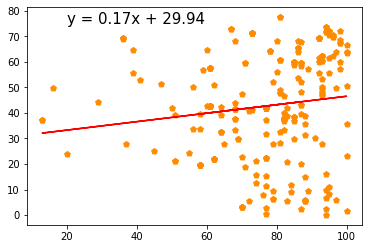

In [27]:
lin_regression(northern_data['Humidity'],northern_data['Lat'], 'p', 'darkorange', 20, 75)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

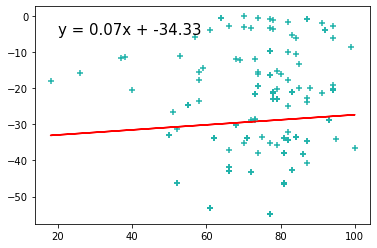

In [16]:
lin_regression(southern_data['Humidity'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

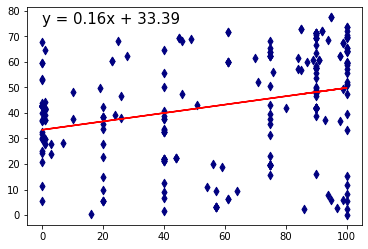

In [25]:
lin_regression(northern_data['Cloudiness'],northern_data['Lat'], 'd', 'navy', 0, 75)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

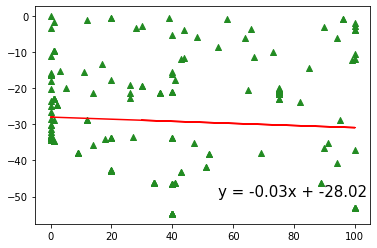

In [22]:
lin_regression(southern_data['Cloudiness'],southern_data['Lat'], '^', 'forestgreen', 55, -50)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

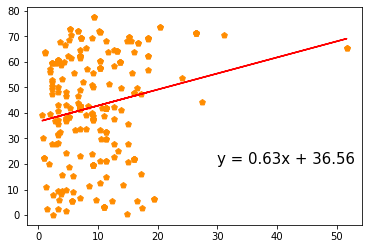

In [21]:
lin_regression(northern_data['Wind Speed'],northern_data['Lat'], 'p', 'darkorange', 30, 20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

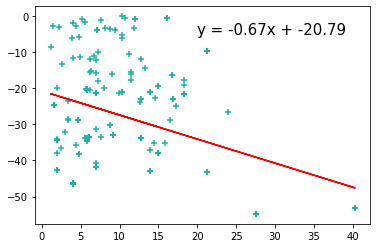

In [20]:
lin_regression(southern_data['Wind Speed'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)

In [ ]:
# Observations:1.) Not shocking, but temp is tightly correllated with latitude.
# 2.) I was surprised that humidity has very little corellation with latitude. I would 
# have thought the closer to the equator, the more humid things are.  3.) I didn't realize
# it gets a little windier as you get closer to the poles